# Quake

By Cascade Tuholske, June 2020

Notebook finds zonal stats of populations for 2015 Nepal earthquakes by raster. <br><br>
**NOTE** CRS should be epsg:4326 for everything!

In [1]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#### Functions
def zone_loop(polys_in, rst_list, stats_type, col, split):
    """ Function loops through rasters, calcs zonal_stats and returns stats as a data frame.
    Args:
        polys_in = polygons
        rst_list = list of paths & fns of rasters
        stats_type = stats type for each poly gone (see zonal stats)
        col = column to merge it all
        split = where to split the file name string (e.g. _matched.tif)
    """
    
    # copy polys to write out
    polys_out = polys_in.copy()
    
    for rst in rst_list:
        
        # Get data name
        data = rst.split(DATA_PATH+'interim/')[1].split(split)[0]
        print('Started', data)
        
        # Run zonal stats
        zs_feats = zonal_stats(polys_in, rst, stats=stats_type, geojson_out=True)
        zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
        
        # Rename columns and merge
        zgdf = zgdf.rename(columns={stats_type: data+'_'+stats_type})
        
        polys_out = polys_out.merge(zgdf[[col, data+'_'+stats_type]], on = col, how = 'inner')
    
    return polys_out

In [3]:
def poly_prep(polys_fn, col):
    "function opens earth quake polygons for zonal loop"
    
    # open
    polys = gpd.read_file(polys_fn)
    
    # subset, be sure to check the admin level
    polys = polys[['geometry', col]]
    
    return polys

## Run on Quake Intensity Contours (MI) from USGS for Nepal 2015



In [46]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*all_Nepal.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/LS15_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_all_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_all_Nepal.tif']

In [47]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)

In [48]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_all_Nepal.tif')

Started LS15
Started GPWv4
Started WP16
Started ESRI16
Started GHS15


In [29]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_quake_pop.shp')

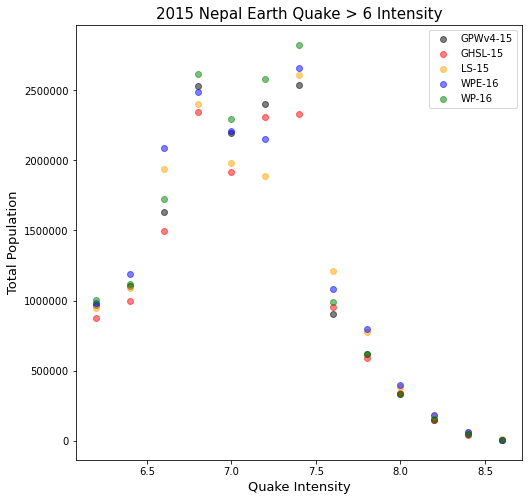

In [50]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = '2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHSL-15', 'LS-15', 'WPE-16', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/AGU2020/Nepal2015_all.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

# Urban

In [55]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_urban_Nepal.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/GHS15_urban_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_urban_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_urban_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_urban_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_urban_Nepal.tif']

In [56]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [57]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_urban_Nepal.tif')


Started GHS15
Started LS15
Started WP16
Started GPWv4
Started ESRI16


In [58]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_urban_quake_pop.shp')

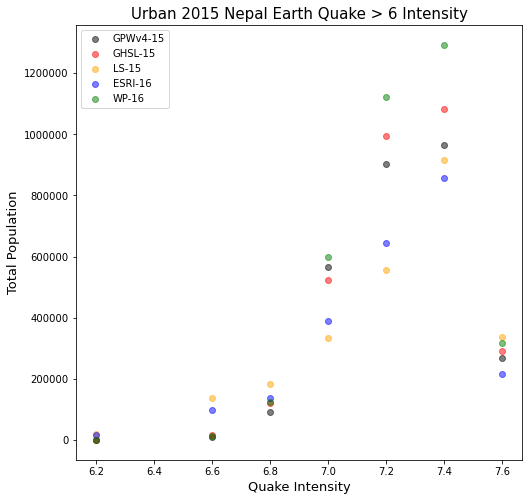

In [59]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Urban 2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHSL-15', 'LS-15', 'ESRI-16', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/AGU2020/Nepal2015_urban.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

# Rural

In [65]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*_rural_Nepal.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_rural_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GPWv4_rural_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_rural_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_rural_Nepal.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/GHS15_rural_Nepal.tif']

In [66]:
# open polys
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'
nepal_polys_fn = DATA_PATH+'raw/USGS_Data/Nepal/shape/mi.shp'

col = 'PARAMVALUE'
nepal_polys = poly_prep(nepal_polys_fn, col)


In [67]:
# Run zonal stats loop
nepal_polys_sum = zone_loop(nepal_polys, rst_fns, 'sum', col, '_rural_Nepal.tif')


Started ESRI16
Started GPWv4
Started WP16
Started LS15
Started GHS15


In [68]:
#### Save the poly sums
nepal_polys_sum.to_file(DATA_PATH+'/interim/nepal_rural_quake_pop.shp')

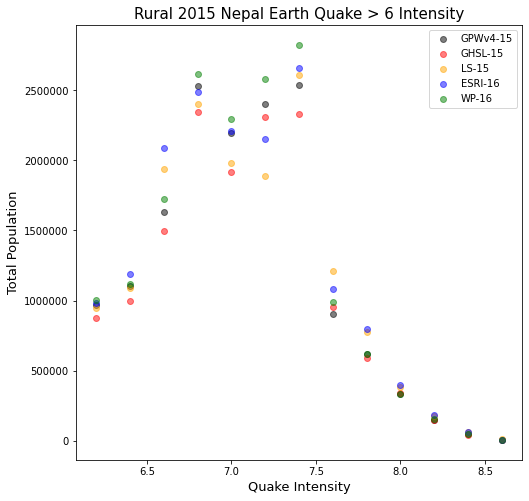

In [69]:
#### plot it Nepal
data = nepal_polys_sum[nepal_polys_sum['PARAMVALUE'] > 6]
title = 'Rural 2015 Nepal Earth Quake > 6 Intensity'

fig, axs = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
ws = 0.25
fig.subplots_adjust(wspace=ws)

axs.scatter(data['PARAMVALUE'], data['GPWv4_sum'], color = 'black', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['GHS15_sum'], color = 'red', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['LS15_sum'], color = 'orange', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['ESRI16_sum'], color = 'blue', alpha = 0.5)
axs.scatter(data['PARAMVALUE'], data['WP16_sum'], color = 'green', alpha = 0.5)

axs.set_title(title, size = 15 )
axs.set_xlabel('Quake Intensity', fontsize = 13)
axs.set_ylabel('Total Population', fontsize = 13)
#plt.ylim([100,10000000])

plt.yscale('linear')
axs.ticklabel_format(useOffset=False, style = 'plain')

labels = ['GPWv4-15','GHSL-15', 'LS-15', 'ESRI-16', 'WP-16']
plt.legend(labels)

# save it out
fig_out = '/Users/cascade/Github/PopGridCompare/data/FIGS/AGU2020/Nepal2015_rural.png'
plt.savefig(fig_out, dpi = 300, facecolor = 'white', bbox_inches='tight')

## Analysis

In [95]:
# All
all_pop = gpd.read_file(DATA_PATH+'/interim/nepal_quake_pop.shp')
all_pop['max'] = all_pop.iloc[:,1:5].values.max(1)
all_pop['min'] = all_pop.iloc[:,1:5].values.min(1)
all_pop['dif'] = all_pop['max'] - all_pop['min']

In [98]:
# Urban 
urban_pop = gpd.read_file(DATA_PATH+'/interim/nepal_urban_quake_pop.shp')
urban_pop['max'] = urban_pop.iloc[:,1:5].values.max(1)
urban_pop['min'] = urban_pop.iloc[:,1:5].values.min(1)
urban_pop['dif'] = urban_pop['max'] - urban_pop['min']

In [104]:
df = pd.DataFrame()
df['PARAMVALUE'] = urban_pop['PARAMVALUE']
df['dif'] = urban_pop['WP16_sum'] - urban_pop['GHS15_sum']
df;

,PARAMVALUE,dif
0,2.8,NaN
1,3.0,NaN
2,3.2,NaN
3,3.4,NaN
4,3.6,NaN
5,3.8,NaN
6,4.0,NaN
7,4.2,-19665.268848
8,4.4,NaN
9,4.6,NaN


In [105]:
# rural 
rural_pop = gpd.read_file(DATA_PATH+'/interim/nepal_rural_quake_pop.shp')
rural_pop['max'] = rural_pop.iloc[:,1:5].values.max(1)
rural_pop['min'] = rural_pop.iloc[:,1:5].values.min(1)
rural_pop['dif'] = rural_pop['max'] - rural_pop['min']

In [106]:
rural_pop

,PARAMVALUE,ESRI16_sum,GPWv4_sum,WP16_sum,LS15_sum,GHS15_sum,geometry,max,min,dif
0,2.8,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((90.08423 31.91667, 90.08387 31...",NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.46715 31.90000, 81.46696 31...",NaN,NaN,NaN
2,3.2,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((81.97315 31.91667, 81.97108 31...",NaN,NaN,NaN
3,3.4,28778.0,2.619679e+04,2.571591e+04,29991.0,2.417036e+04,"MULTIPOLYGON (((82.98663 31.91667, 82.98523 31...",29991.000,2.571591e+04,4275.091797
4,3.6,440133.0,3.665828e+05,3.581681e+05,398353.0,3.270798e+05,"MULTIPOLYGON (((84.81601 31.93333, 84.80491 31...",440133.000,3.581681e+05,81964.906250
5,3.8,690782.0,5.978650e+05,5.705852e+05,638862.0,5.466771e+05,"MULTIPOLYGON (((85.14253 31.75000, 85.14092 31...",690782.000,5.705852e+05,120196.750000
6,4.0,1447496.0,1.337989e+06,1.370039e+06,1278918.0,1.203884e+06,"MULTIPOLYGON (((84.66259 31.40000, 84.65680 31...",1447496.000,1.278918e+06,168578.000000
7,4.2,1691728.0,1.371940e+06,1.396989e+06,1655900.0,1.255085e+06,"MULTIPOLYGON (((85.13591 31.01667, 85.13522 31...",1691728.000,1.371940e+06,319788.375000
8,4.4,1650961.0,1.451328e+06,1.426692e+06,1486528.0,1.347470e+06,"MULTIPOLYGON (((84.80292 30.56667, 84.80248 30...",1650961.000,1.426692e+06,224269.375000
9,4.6,1457114.0,1.189069e+06,1.245456e+06,1396544.0,1.113182e+06,"MULTIPOLYGON (((84.68411 30.28333, 84.68384 30...",1457114.000,1.189069e+06,268045.375000
